<div class="alert alert-success">
<b> Комментарий от ревьюера 3</b>

Спасибо, что учла мои комментарии. Ты приложила много усилий, чтобы довести проект до конца, надеюсь, что эта работа помогла тебе лучше понять теорию. Я принимаю проект и желаю удачи в прохождении курса!

</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Привет еще раз. Спасибо, что доделала работу. Поправить осталось немного, вот комментарии, которые я оставила в этот раз:
    
*[первый](#comm1)
    
*[второй](#comm2)

</div>

Привет, Мария.

Меня зовут Людмила, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на «ты», если не против)

Но если это не удобно — дай знать, и мы перейдем на «вы». Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Мои комментарии будут в ячейках «Комментарий от ревьюера».

---    
<div class="alert alert-block alert-danger">
    
Критическое замечание, которые следует исправить.
</div> 
    
<div class="alert alert-block alert-warning">
    
Замечание\совет на будущее.
</div>
    
<div class="alert alert-block alert-success">
    
Когда всё сделано правильно.
</div>
    
---        
    
Если ты вносишь изменения в проект по моим рекомендациям, указывай, пожалуйста, это в своих комментариях. Будет удобно, если обозначишь свои комментарии заметным цветом или поместишь 

<div class="alert alert-info">
    
в такую ячейку
</div>

Давай при работе с проектом мы будем общаться с тобой в диалоге, поэтому не удаляй и не перемещай мои комментарии, это поможет мне сделать повторную  проверку проекта быстрее.
___

# Принятие решений в бизнесе

**КОНТЕКСТ** - Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки. Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

Задача проекта: подготовить список гипотез для увеличения выручки. Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

**План работы**
- Загрузка данных и первичный анализ;
- Предобработка данный;
- Приоретизация гипотез;
- Анализ А/B тестов;
- Решение по результатам тестов.

<div class="alert alert-warning">
<b>Комментарий от ревьюера</b> 
    
Вступление к проекту станет лучше, если ты добавишь заголовок и план работы.
Тогда получатель исследования сможет быстрее его понять.

</div>

<div class="alert alert-info">
добавила
</div>

<div class="alert alert-success">
<b> Комментарий от ревьюера 2</b>

Теперь вся вводная информация о проекте есть в одном месте. 👍

</div>

In [1]:
#импортируем необходимые библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import math
import numpy as np

<div class="alert alert-block alert-success">
    
<b>Комментарий от ревьюера</b> 
    
Все нужные библиотеки загружены, отлично.
</div>

**Описание данных**

Файл /datasets/hypothesis.csv:

- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Файл /datasets/orders.csv:

- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:

- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [2]:
#загрузим данные 
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

Посмотрим на каждый датасет и информацию о нём

In [3]:
display(hypothesis,hypothesis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


None

Вывод: 
 - 9 различных гипотез с оценками от 1 до 10 по 4м критериям.
 - некорректные названия столбцов (заглавные буквы)
 - пропуски и дубликаты отсутсвуют, типы данных корректны.

In [4]:
display(orders,orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


None

In [5]:
# проверим наличие дубликатов 
orders.duplicated().sum()

0

Вывод:
- некорректные названия столбцов
- некорреткный тип данных у столбца date
- пропусков нет

In [6]:
display(visitors,visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


None

In [7]:
# проверим наличие дубликатов 
visitors.duplicated().sum()

0

Вывод:
- некорректный тип данных столбца date
- пропусков нет
- необходимо проверить на дубликаты 

**НЕОБХОДИМО:**
- привести названия столбцов к нижнему регистру и к корректной форме записи
- изменить тип данных в столбцах date

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

При знакомстве с данными нам нужно еще выполнить проверку на дубликаты.
</div>

<div class="alert alert-info">
    
исправила
</div>


# Предобработка данных

Приведем названия всех столбцов к нижнему регистру 

In [8]:
hypothesis.columns = [x.lower().replace(' ', '_') for x in hypothesis.columns.values]

Корректно переименуем столбцы 

In [9]:
orders.columns = ['transaction_id','visitor_id', 'date','revenue','group']

приведём столбцы с датами к нужному типу данных 

In [10]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, здесь нужно поменять формат даты.
</div>

проверим на неочевидные дубликаты по группам А/В теста 

In [11]:
#проверим на неочевидные дубликаты по группам А/В теста 
display(orders['group'].unique(),visitors['group'].unique())

array(['B', 'A'], dtype=object)

array(['A', 'B'], dtype=object)

Посчитаем количество уникальных пользоваталей в A/B тесте

In [12]:
len(orders['visitor_id'].unique())

1031

Посчитаем количество пользователей по группам 

In [13]:
group_a = orders.query('group == "A"')
len(group_a['visitor_id'].unique())
group_b = orders.query('group == "B"')
len(group_b['visitor_id'].unique())
group_user_cnt = len(group_a['visitor_id'].unique()) + len(group_b['visitor_id'].unique())
display(len(group_a['visitor_id'].unique()),
       len(group_b['visitor_id'].unique()),
group_user_cnt)

503

586

1089

In [14]:
union = group_a.merge(group_b,on = 'visitor_id')
len(union['visitor_id'].unique())

58

58 пользователей входят в обе группы, так как невозможно определить к какой группе они принадлежат, избавимся от этих данных

In [15]:
visitor_both_group = union['visitor_id'].to_list()
orders = orders[~orders['visitor_id'].isin(visitor_both_group)]
len(orders['visitor_id'].unique())

973

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Молодец, что выполнила проверку! Тут нужно учитывать, что удаляем мы только тех пользователей, кто совершил заказы. Поскольку таблица с визитами у нас содержит уже агрегированные данные, то мы не сможем удалить из нее этих пользователей. В итоге оказывается, что выполняем не совсем корректные действия, которые будут снижать итоговое значение количества заказов на посетителя. Таких пользователей немного. Можно оставить их в тесте.
    
</div>

In [16]:
display( hypothesis,orders,visitors)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


Выполнили предобработку данных, приевли названия столбцов к нижнему регистру, заменили тип данных в столбцах 'date', удалили данные о пользователях которые были в обеих группах (А,В)

# Приоретизация гипотез

ICE

In [17]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis.sort_values('ice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000


<div class="alert alert-block alert-warning">
    

**Комментарий от ревьюера**

Удобнее вывести названия гипотез целиком: `pd.set_option('max_colwidth', 200)` и округлить значения в колонке ICE до 2 знаков после запятой.
    

</div>

Лидируют гипотезы: №8, №0, №7

RICE

In [18]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / \
                    hypothesis['efforts']
hypothesis.sort_values('rice', ascending=False)

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.000000,3.0


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Молодец, что выводишь таблицу дважды, каждый раз с сортировкой по одному из фреймворков - так различия в их работе максимально наглядны.
</div>

Результаты несколько разнятся. Это связано с тем, что RICE учитывает оценку количества пользователей, которых затронут изменения и чем их больше, тем приоритет гипотезы выше. Для ICE этот критерий не учитывается.

Стоит отметить, что в обоих случаях можно выделить приоритетными гипотезы под номерами 7, 0, 6. Несмотря на то, что их приоритет разнится при оценке разными фреймворками, в обоих случаях они вверху нашего "рейтинга". Гипотезы же 4, 5, 3, 1 в обоих случаях имеют низкий приоритет.

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Здесь стоит добавить чуть подробнее, в чем заключается различие формул, что обозначает охват пользователей, и какую гипотезу ты рекомендуешь тестировать первой. Так между частями проекта будет логическая связь.

</div>

<div class="alert alert-info">
    
исправила
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b> 
    
Здорово, теперь в выводе есть все что нужно.
</div>

# Анализ результатов A/B теста

**1. Построим график кумулятивной выручки по группам.**

<div class="alert alert-warning">
<b>Комментарий от ревьюера</b> 
    
Удобнее оформлять отдельные вопросы задания в виде заголовков markdown. Например вот так: 

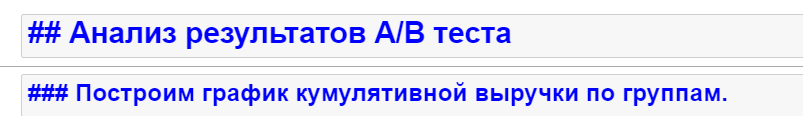
    
Так ты сможешь быстро перейти в нужные пункты через оглавление тетрадки.
    
Подробнее о возможностях markdown сказано по ссылке:
    
https://github.com/sandino/Markdown-Cheatsheet

</div>

In [19]:
date_groups = orders[['date', 'group']].drop_duplicates().reset_index(drop=True)

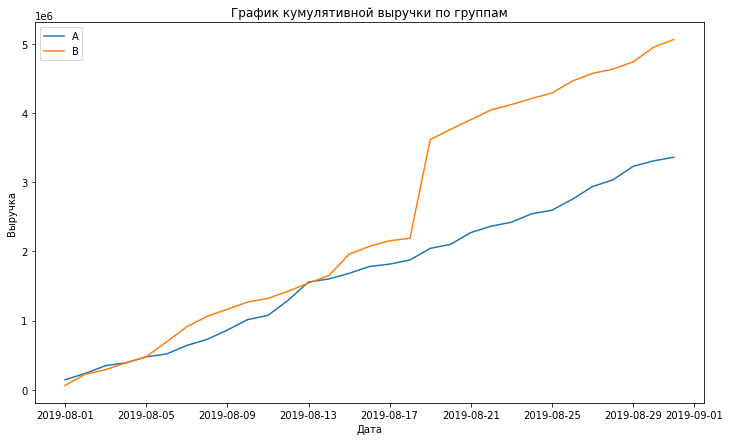

In [20]:
ordersAggregated = date_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id' : 'nunique',
            'visitor_id' : 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = date_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам')
plt.legend();

Вывод: Выручка в обеих группах возрастает. В группе B выручка выше практически на протяжении всего месяца, в этой группе наблюдается резкий рост 19го августа, что может сигнализировать о всплесках числа заказов либо об очень дорогих заказах.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, пока мы не знаем, с чем связан скачок в группе B: с резким увеличением количества заказов или с ростом стоимости.
</div>

**2. Построим график кумулятивного среднего чека по группам.**

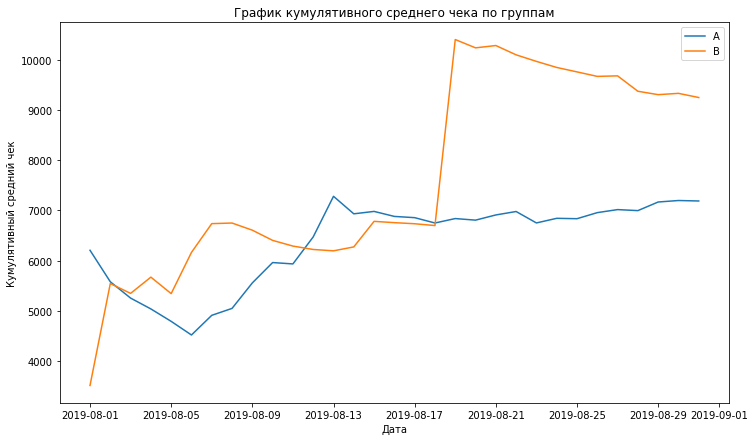

In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12, 7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.ylabel('Кумулятивный cредний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам')
plt.legend();

Вывод: К концу графика средний чек стабилизируется. Скорее всего, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). Возможно нужно больше данных, чтобы прийти к реальному среднему чеку.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Да, крупные заказы могли стать причиной резкого роста.
</div>

**3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.**

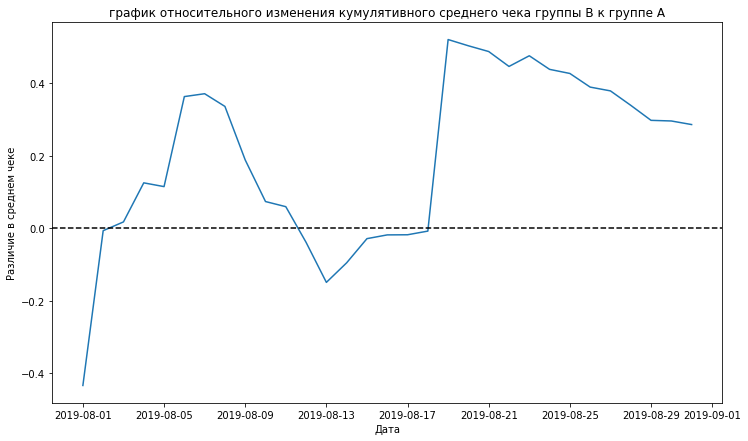

In [22]:
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12, 7))
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.ylabel('Различие в среднем чеке')
plt.xlabel('Дата')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('график относительного изменения кумулятивного среднего чека группы B к группе A');

Вывод: 13.08 график опускается в низшую точку. Видны резкие перепады, особенно 18.08. Очевидно есть выбросы. Результаты теста резко менялись в некоторые даты, возможно тогда были сделаны анамальные заказы.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Действительно, этот график не стабилизировался.
</div>

**4. Посторим график кумулятивного среднего количества заказов на посетителя по группам.**

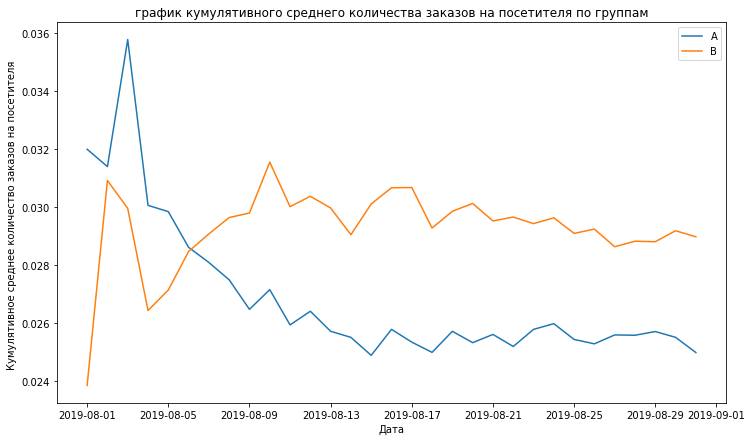

In [23]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(12, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя ')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам');
plt.legend();

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Здесь и дальше ты называешь один и тот же показатель иногда "конверсией", а иногда "средним количеством заказов на посетителя". Вторая формулировка более корректная, так как для расчета конверсии в чистом виде, нам нужны id посетителей. Поправь, пожалуйста, формулировки, это можно сделать с помощью автозамены: в меню Edit ➡ Find and Replace. 
    
Кнопка со скриншота ниже позволяет сделать замены сразу во всех ячейках:
    
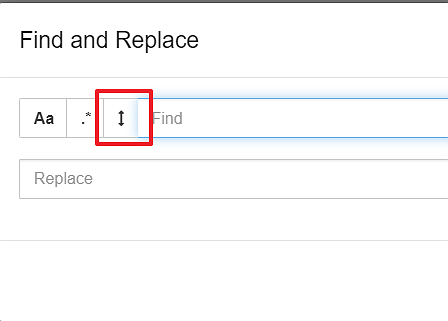
    
</div>

<div class="alert alert-info">
    
исправила
</div>

<div class="alert alert-block alert-success">
<b>Комментарий от ревьюера 2</b> 
    
Всё верно, формулировки совпадают.
</div>

Изначально среднее количество заказов на посетителя группы А было выше группы В, но после 7.08 среднее количество заказов на посетителя группы В начало возростать и зафиксировалось, а группы А уменьшилось и также зафиксировалась.

**5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.**

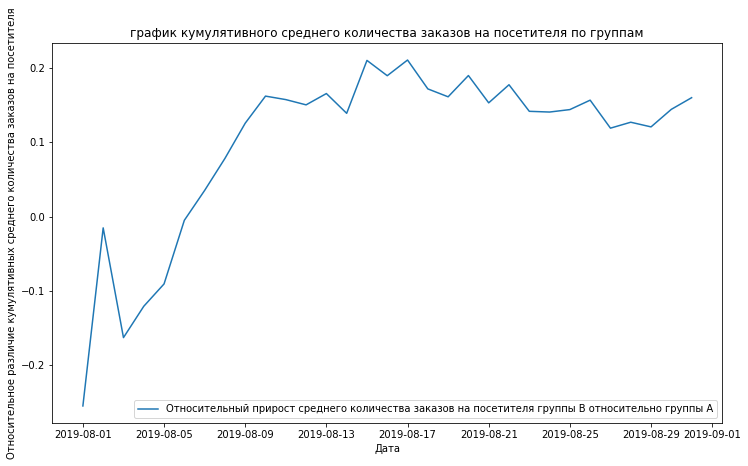

In [24]:
cumulativeData['conversion'] = (cumulativeData['orders'] / cumulativeData['visitors'])
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(12, 7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост среднего количества заказов на посетителя группы B относительно группы A")
plt.ylabel('Относительное различие кумулятивных среднего количества заказов на посетителя')
plt.xlabel('Дата')
plt.title('график кумулятивного среднего количества заказов на посетителя по группам')
plt.legend();

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Для удобства на график можно добавить линию на значение 0 и еще одну линию серым цветом на значение 0.15 по оси y, так как около этого значения намечается тенденция к стабилизации.
    
</div>

Вывод: В начале теста группа B просела относительно группы A, затем резко выросла и стабилизировалась.

**6. Построим точечный график количества заказов по пользователям.**

In [25]:
ordersByUsers = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsers.columns = ['visitor_id','orders']
ordersByUsers

,visitor_id,orders
0,5114589,1
1,6958315,1
2,11685486,1
3,39475350,1
4,47206413,1
...,...,...
968,4259830713,1
969,4278982564,1
970,4279090005,1
971,4281247801,1


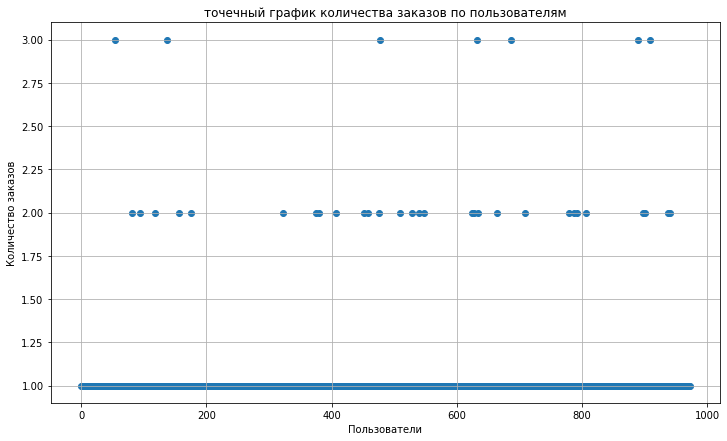

In [26]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('точечный график количества заказов по пользователям')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Количество заказов')
plt.scatter(x_values, ordersByUsers['orders']);

Вывод: Большинство покупателей выполняли заказ только 1 раз, также есть покупатели которые выполняли заказы 2 или 3 раза.

**7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.**

In [27]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Вывод: Не более 5% пользователей оформляли больше одного заказа. И 1% пользователей заказывал более двух раз. Примем 2 заказа на одного пользователя за нижнюю границу числа заказов.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Такое определение выбросов для количества заказов корректно.
</div>

**8. Построем точечный график стоимостей заказов.**

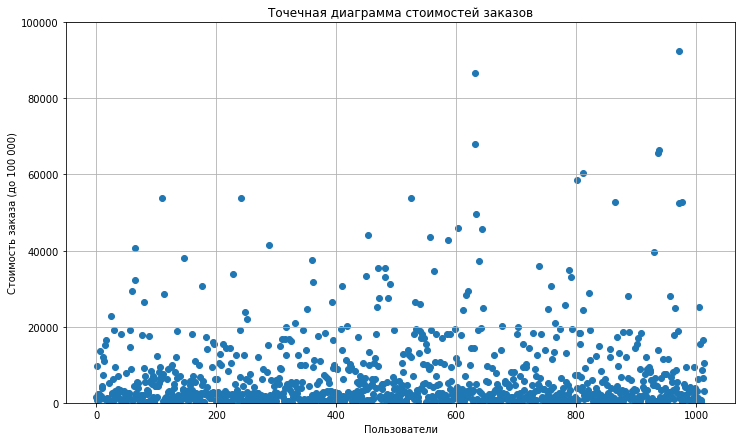

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(12, 7))
plt.grid(True)
plt.title('Точечная диаграмма стоимостей заказов')
ax = plt.gca()
ax.set_xlabel('Пользователи')
ax.set_ylabel('Стоимость заказа (до 100 000)')
plt.ylim(0, 100000)
plt.scatter(x_values, orders['revenue']);

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Полезно добавить еще один график, без ограничения по оси Y. Так мы будем видеть и выбросы, и основную часть заказов.

</div>

Вывод: Большинство заказов не превышает 20 000, но есть выбросы около 100 000.

**9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.**

In [29]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Вывод: Не более 5% заказов дороже 26 785 рублей. И только 1% заказов дороже 53 904 рублей. Определим 53 904 за нижнюю границу стоимости заказов.

<div class="alert alert-block alert-success"> <b>Комментарий от ревьюера</b> 
    
Молодец, что разобралась с аномалиями в данных и корректно освоила расчет кумулятивных метрик.
</div>

**10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.**

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**
    
Нужно еще указать, какой метод будет использоваться для проверки гипотез и почему.
</div>

<div class="alert alert-info">
    
не совсем поняла, что именно нужно здесь указать, буду очень благодарна за подсказку)
</div>

<a id="comm1"></a>
<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**
    
Мы используем метод Манна-Уитни. Надо сказать об этом и пояснить, почему он здесь подходит.
</div>

<div class="alert alert-info">
    
сделала
</div>

<div class="alert alert-block alert-success"> <b>Комментарий от ревьюера 2</b> 
    
Молодец, что сделала дополнительную проверку.
</div>

Перед тестом Манна-Уитни проверим гипотезу о нормальном распределении с помощью критерия Шапиро-Уилка:

- Нулевая гипотеза: среднее количество заказов на посетителя группы A распределено нормально 
- Альтернативная гипотеза: среднее количество заказов на посетителя группы A не распределено нормально
 
α=5% критический уровень статистической значимости.

**Аналогично для группы B.**

In [30]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['user_id', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

# зададим уровень значимости 5%
alpha=0.05
p=st.shapiro(sampleA)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа А')
else:
    print('Отклонить гипотезу о нормальности распределении группа А')
    
p=st.shapiro(sampleB)
print("Shapiro-Wilk normality test, W-statistic: %f, p-value: %f" % p)
if p[1] > alpha:
    print('Принять гипотезу о нормальности распределении группа В')
else:
    print('Отклонить гипотезу о нормальности распределении группа В')

Shapiro-Wilk normality test, W-statistic: 0.132646, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа А
Shapiro-Wilk normality test, W-statistic: 0.150587, p-value: 0.000000
Отклонить гипотезу о нормальности распределении группа В


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Поскольку  в обеих группах данные не подходят под нормальное распределение - воспользуемся U-критерием Манна — Уитни

Сформулируем гипотезы.

- Нулевая: Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет.
- Альтернативная: Cтатистически значимые различия в среднем количестве заказов на посетителя между группами есть.

α=5% критический уровень статистической значимости.

In [31]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transaction_id', 'visitor_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transaction_id' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

In [32]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

<div class="alert alert-block alert-warning">
    
**Комментарий от ревьюера**

Код в ячейках 28-29 можно сократить: нам не нужно собирать кумулятивные данные для проверки гипотез, потому что это уже сделано выше.

</div>

In [33]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results=st.mannwhitneyu(sampleA, sampleB)
print('p-значение: {:.3f}'.format(results.pvalue))
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".')
else:
    print('Не получилось отвергнуть нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет.".')

print("Относительный прирост среднего количества заказов на посетителя группы B: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

p-значение: 0.011
Отвергаем нулевую гипотезу: "Cтатистически значимых различий в среднем количестве заказов на посетителя между группами нет".
Относительный прирост среднего количества заказов на посетителя группы B: 0.160


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Хорошо, что ты подписываешь выводимые числа. Так их нельзя перепутать.
</div>

Первое число — p-value = 0.011 меньше 0.05. Значит, нулевую гипотезу о том, что в сренем количество заказов равно и статистически значимых различий  между группами нет отвергаем. Среднее количество заказов различаются значимо.
Относительный проигрыш группы A составляет 16%

**11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.**

- Нулевая гипотеза :Средние чеки групп A и B равны, статистически значимых отличий нет.
- Альтернативная гипотеза :Средние чеки групп A и B различны, статистически значимые отличия есть.

α=5% критический уровень статистической значимости.

In [34]:
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-значение:  0.829
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя
0.287


Вывод:
- Первое число — p-value = 0.829 значительно больше 0.05. Значит, нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет принимаем.
- При этом средний чек группы B значительно выше чем у А, почти на 29%, но тут свою роль могли сыграть выбросы, проверим это далее на очищенных данных

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Да, по этому показателю между группами нет статистически значимых различий.
</div>

**12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.**

- Нулевая гипотеза: В среднем количество заказов на посетителя групп A и B равны, статистически значимых отличий нет. 
- Альтернативная гипотеза: В среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть 

α=5% критический уровень статистической значимости

<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Лучше избегать ручного ввода значений при фильтрации: можно использовать непосредственно результат расчета выбранного перцентиля. 
    
Для этого вписанные вручную числа надо заменить на такие же расчеты, как ты использовала для границы определения аномальных заказов, только там ты указываешь список перцентилей, а здесь нам нужен один.

</div>

<div class="alert alert-info">
    
исправила
</div>

<a id="comm2"></a>
<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера 2**

Если промотать ячейку вправо, там есть еще одно число 2 в первой строке. Замени его, пожалуйста, тоже.

</div>

<div class="alert alert-info">
    
заменила
</div>

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Так не придется менять вписанные вручную числа, если поменяются данные.
</div>

In [35]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 99)]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0)
results = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('p-значение: ', "{0:.3f}".format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу: разница статистически значима")
else:
    print("Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя")

print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение:  0.007
Отвергаем нулевую гипотезу: разница статистически значима
0.189


<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**

Верно, при анализе "очищенных данных" p-value стало еще меньше и все так же меньше 0.05, следовательно, между группами есть статистически значимые различия.
</div>

Вывод:
Результаты по среднему количеству заказов на посетителя значимо не изменился. p-value стал чуть больше на 0,004, что никак не меняет наших выводов. Проигрыш группы A на очищенных данных немного увеличился 19% против 16% на сырых

**13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.**

- Нулевая гипотеза: Средние чеки групп A и B равны, статистически значимых отличий нет.
- Альтернативная гипотеза: Средние чеки групп A и B различны, статистически значимые отличия есть.

α=5% критический уровень статистической значимости.

In [36]:
print('Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: {:.3f}'.format(
orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()\
/orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'].mean()-1))
       
       
results = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'],
                             orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue'])
print('P-value: "{0:.3f}"'.format(results.pvalue))

Относительное изменение среднего чека в группе B по отношению группы A после очистки данных: -0.032
P-value: "0.788"


<div class="alert alert-block alert-danger">
    
**Комментарий от ревьюера**

Добавь здесь, пожалуйста, тоже, можем ли мы отвергнуть нулевую гипотезу.

</div>

<div class="alert alert-info">
    
исправила
</div>

p-value = 0.788 значительно больше 0.05. Значит, нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет принимаем.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера 2**

Да, здесь мы снова не можем отвергнуть нулевую гипотезу.
</div>

Вывод:
- p-value уменьшился почти на 0.05, но по прежнему значительно выше 0,05
- обратим внимание на разницу между средним чеком. Она упала с 29% в пользу B до 3% в пользу A! Это еще раз заставляет убедиться, что статистически значимых различий по этой метрике между группами нет, а наблюдаемая на неочищенных данных разница как мы и предполагали была связана с выбросами.

Итоговый вывод:
- есть статистически значимые различия по среднему количеству заказов на посетителя  между группами (как по сырым так и по очищенным данным), при этом преимущество у группы B порядка 19%;
- нет статистически значимых различий по среднему чеку между группами (как по сырым так и по очищенным данным);
- график различия среднего количества заказов на посетителя между группами показывает, что результаты группы B лучше группы A в конце исследования приблизительно на 13-17%, при этом есть тенденция к еще небольшому улучшению;
- график различий кумулятивного среднего чека говорит нам о преимуществе группы B только из - за выброса, после чего метрика начинает снижаться к более естественному положению


Исходя из обнаруженных фактов тест следует остановить и признать его успешным в части улучшения среднего количества заказов на посетителя в целевой группе B в части среднего чека нельзя утверждать, что какая - либо из групп имеет преимущество над другой. Оснований полагать, что при продолжении теста разница между группами в среднем количестве заказов на посетителя либо среднем чеке значимо изменятся нет, т.к. колебания в графиках носят затухающий характер.

<div class="alert alert-block alert-success">
    
**Комментарий от ревьюера**
    
Верно, данных для принятия решения у нас уже достаточно. 
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера</b>

Благодарю тебя за выполнение проекта. Вижу ты постаралась, когда работала над ним. Однако, в проекте есть несколько замечаний, которые надо исправить:

* добавить проверку на дубликаты;
* дополнить вывод по приоритизации;
* скорректировать формулировки;
* дополнить описание статистических расчетов;
* не использовать ручной ввод при фильтрации.
       
Жду проект после доработки. Уверена, ты справишься. 💪
</div>

<div class="alert alert-block alert-info">

<b>Итоговый комментарий от ревьюера 2</b>

Замечания, которые осталось исправить:

* дополнить описание статистических расчетов;
* не использовать ручной ввод при фильтрации.
       
</div>